<a href="https://colab.research.google.com/github/SkullBanger77/Bio-Oil-Extraction/blob/main/Bio_oil_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_excel("/content/Bio-Oil.xlsx")

In [3]:
data.head()

,Cel,Hem,Lig,VM,Ash,FC,C%,H%,O%,N%,PS,HT,PT,Temp,Yield,Vis,H/C,O/C,Calorific value
0,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.0,100,500.0,40.0,51.20,0.08256,1.45,0.24,29.71
1,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.0,100,500.0,40.0,50.15,0.02533,1.57,0.16,35.92
2,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.0,100,500.0,40.0,53.25,0.03058,1.58,0.17,35.61
3,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.0,100,500.0,40.0,49.65,0.03189,1.45,0.18,34.32
4,64.50,14.00,8,81.15,5.17,7.63,70.91,10.50,16.59,1.69,0.1,16,500.0,25.0,68.50,0.00142,NaN,NaN,29.06


In [4]:
data= np.array(data)
X = data[:,0:7]
Y = data[:,7:8]


In [5]:
X

array([[37.92, 27.33, 14.2, ..., 2.08, 12.63, 52.48],
       [37.92, 27.33, 14.2, ..., 2.08, 12.63, 52.48],
       [37.92, 27.33, 14.2, ..., 2.08, 12.63, 52.48],
       ...,
       [23.3, 20.6, 16.6, ..., 4.95, 8.05, 38.42],
       [31.4, 19.8, 18, ..., 2.08, 24.09, 42.22],
       [32.3, 19.8, 17.1, ..., 4.1, 4.1, 64.99]], dtype=object)

In [6]:
Y

array([[8.69],
       [8.69],
       [8.69],
       [8.69],
       [10.5],
       [7.91],
       [2.95],
       [2.95],
       [2.95],
       [6.01],
       [6.01],
       [6.01],
       [6.01],
       [6.1],
       [5.24],
       [6.1],
       [6.23],
       [6.44],
       [6.59],
       [6.19],
       [6.58],
       [6.0],
       [5.71],
       [5.71],
       [5.71],
       [5.71],
       [5.71],
       [5.7],
       [6.0],
       [5.7],
       [5.7],
       [5.1],
       [6.38],
       [6.2],
       [3.58],
       [3.58],
       [3.58],
       [3.58],
       [3.58],
       [5.1],
       [5.1],
       [5.1],
       [6.0],
       [6.0],
       [6.0],
       [9.08],
       [12.0],
       [10.2],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.0],
       [6.44],
       [6.45],
       [6.71],
       [6.45],
       [6.38],
       [6.2],
       [6.3],
       [5.3],
       [5.8],
       [5.8],
       [6.5],
       [5.9],
       [5.6],
       [6.3],
       [5.9],
       [5.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
df=pd.DataFrame(data)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.0,100,500.0,40.0,51.2,0.08256,1.45,0.24,29.71
1,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.0,100,500.0,40.0,50.15,0.02533,1.57,0.16,35.92
2,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.0,100,500.0,40.0,53.25,0.03058,1.58,0.17,35.61
3,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.0,100,500.0,40.0,49.65,0.03189,1.45,0.18,34.32
4,64.5,14.0,8,81.15,5.17,7.63,70.91,10.5,16.59,1.69,0.1,16,500.0,25.0,68.5,0.00142,NaN,NaN,29.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,24.6,23.1,14.8,91.76,1.49,1.1,55.87,7.94,33.2,2.74,1.0,15,500.0,25.0,31.0,0.034,NaN,NaN,37.65
316,22.0,12.3,12.4,61.29,9.14,2.2,29.29,3.91,29.84,NaN,1.0,20,550.0,40.0,66.66,0.08036,NaN,NaN,37.65
317,23.3,20.6,16.6,71,4.95,8.05,38.42,8.27,45.14,7.48,1.25,20,475.0,40.0,38.0,0.02172,NaN,NaN,32.3
318,31.4,19.8,18,73.49,2.08,24.09,42.22,6.7,46.92,3.35,1.8,20,550.0,40.0,46.0,0.00147,NaN,NaN,37.65


In [10]:
dft=df.dropna()

In [11]:
dft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.0,100,500.0,40.0,51.2,0.08256,1.45,0.24,29.71
1,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.0,100,500.0,40.0,50.15,0.02533,1.57,0.16,35.92
2,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.0,100,500.0,40.0,53.25,0.03058,1.58,0.17,35.61
3,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.0,100,500.0,40.0,49.65,0.03189,1.45,0.18,34.32
9,38.8,19.8,27,81.5,1.75,16.7,48.6,6.01,44.1,0.99,2.0,30,450.0,25.0,27.7,0.00245,4.18,0.67,25.3
10,38.8,19.8,27,81.5,1.75,16.7,48.6,6.01,44.1,0.99,2.0,30,550.0,25.0,30.5,0.00267,3.1,0.59,25.4
11,38.8,19.8,27,81.5,1.75,16.7,48.6,6.01,44.1,0.99,2.0,30,600.0,25.0,32.26,0.0027,2.48,0.49,28.5
12,38.8,19.8,27,81.5,1.75,16.7,48.6,6.01,44.1,0.99,2.0,30,650.0,25.0,31.97,0.00279,2.42,0.46,28.9
13,32.0,19.2,18.8,84.4,3.9,11.9,42.0,6.1,47.4,0.4,2.0,6,600.0,25.0,37.0,0.0092,2.23,0.56,36.3
14,34.3,29.0,20.9,62.7,12.7,15.1,37.86,5.24,35.32,0.68,1.5,180,550.0,40.0,48.1,0.00857,2.34,0.88,18.07


In [12]:
dft= np.array(dft)
X = dft[:,0:14]
Y = dft[:,14]


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
transformer = StandardScaler().fit(X)

In [15]:
newX = transformer.transform(X)

In [16]:
X=newX

In [17]:
X

array([[ 1.71696347e-01,  2.85937467e-01, -8.24712130e-01,
         2.64967326e-01, -6.25058225e-01, -6.45241296e-01,
         9.18626035e-01,  2.32699156e+00, -1.01550103e+00,
         1.04603274e+00, -6.24834887e-01,  1.90777939e+00,
         4.55557941e-02,  4.73636966e-01],
       [ 1.71696347e-01,  2.85937467e-01, -8.24712130e-01,
         2.64967326e-01, -6.25058225e-01, -6.45241296e-01,
         9.18626035e-01,  2.32699156e+00, -1.01550103e+00,
         1.04603274e+00, -6.24834887e-01,  1.90777939e+00,
         4.55557941e-02,  4.73636966e-01],
       [ 1.71696347e-01,  2.85937467e-01, -8.24712130e-01,
         2.64967326e-01, -6.25058225e-01, -6.45241296e-01,
         9.18626035e-01,  2.32699156e+00, -1.01550103e+00,
         1.04603274e+00, -6.24834887e-01,  1.90777939e+00,
         4.55557941e-02,  4.73636966e-01],
       [ 1.71696347e-01,  2.85937467e-01, -8.24712130e-01,
         2.64967326e-01, -6.25058225e-01, -6.45241296e-01,
         9.18626035e-01,  2.32699156e+00, -1.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Split the data into training and test sets (80% for training, 20% for testing)
dft= np.array(dft)
X = dft[:,0:7]
Y = dft[:,7:8]
transformer = StandardScaler().fit(X)
newX = transformer.transform(X)
X=newX
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [35]:
rf = RandomForestRegressor(n_estimators=13, random_state=140)
Y = y_train.ravel()
y_train = np.array(Y).astype(int)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

0.7227597981445102

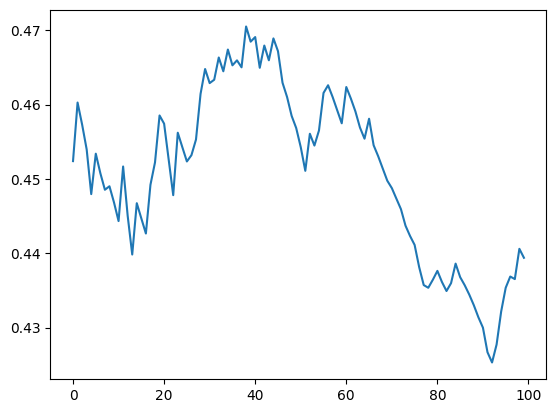

In [33]:
cost = []
for i in range(100, 200):
    rf = RandomForestRegressor(n_estimators=i, random_state=140)
    Y = y_train.ravel()
    y_train = np.array(Y).astype(int)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    from sklearn.metrics import mean_squared_error, r2_score
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cost.append(r2)

import matplotlib.pyplot as plt
plt.plot(cost)

# for i in range(1, 100):
#      print(i, cost[i])